In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 在 notebook 里工作目录通常就是 experiments/
csv_path = os.path.join("..", "results", "tables", "exp6_bert_multicontext_pier.csv")
df = pd.read_csv(csv_path)

df.head()


,ContextType,ContextLabel,TargetModel,Dose,MeanPIER,StdPIER,NumEvalPoints,NumFitPoints,ContextRawSize
0,length,len_long_(>15),BERT,0.40,0.145617,0.163893,100,400,561
1,length,len_long_(>15),BERT,0.52,0.153184,0.161201,100,400,561
2,length,len_long_(>15),BERT,0.64,0.192800,0.166706,100,400,561
3,length,len_long_(>15),BERT,0.76,0.248713,0.184730,100,400,561
4,length,len_long_(>15),BERT,0.88,0.279073,0.158485,100,400,561


In [2]:
def plot_context_type(df, context_type, target_models=None):
    """
    对某一个 ContextType（length / sentiment / negation），
    分别画出不同 ContextLabel 下，各个 TargetModel 的 PIER vs Dose 曲线。
    """
    sub = df[df["ContextType"] == context_type].copy()
    if target_models is None:
        target_models = sorted(sub["TargetModel"].unique())

    context_labels = sorted(sub["ContextLabel"].unique())

    n_rows = len(context_labels)
    fig, axes = plt.subplots(n_rows, 1, figsize=(6, 3 * n_rows), sharex=True)

    if n_rows == 1:
        axes = [axes]

    for ax, ctx_label in zip(axes, context_labels):
        df_ctx = sub[sub["ContextLabel"] == ctx_label]
        for tm in target_models:
            df_tm = df_ctx[df_ctx["TargetModel"] == tm].sort_values("Dose")
            if df_tm.empty:
                continue
            ax.plot(
                df_tm["Dose"],
                df_tm["MeanPIER"],
                marker="o",
                label=tm,
            )
        ax.set_title(f"{context_type} = {ctx_label}")
        ax.set_ylabel("Mean PIER")
        ax.grid(True, alpha=0.3)
        ax.legend()

    axes[-1].set_xlabel("Dose (mask ratio)")
    fig.suptitle(f"DISCO Uniqueness vs Dose ({context_type} contexts)", y=1.02)
    plt.tight_layout()
    plt.show()


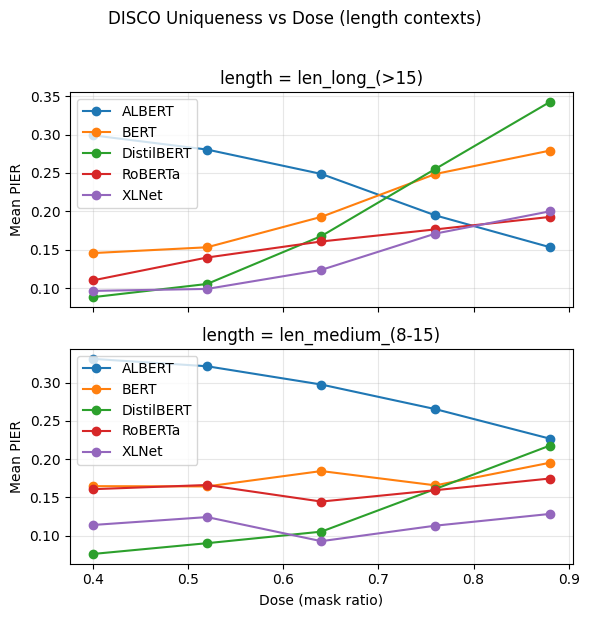

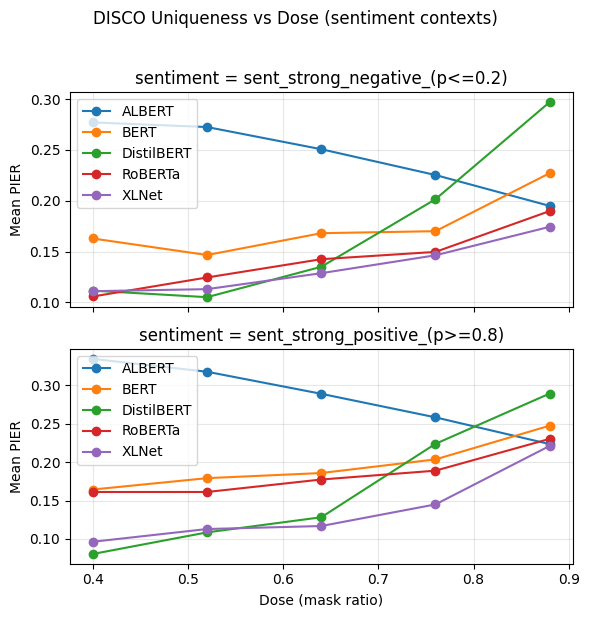

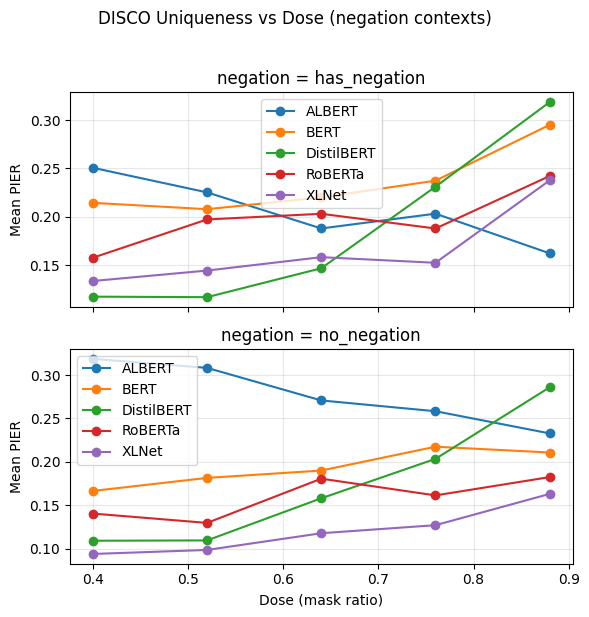

In [3]:
# 长度 context
plot_context_type(df, context_type="length")

# 情感强度 context
plot_context_type(df, context_type="sentiment")

# 否定 context
plot_context_type(df, context_type="negation")


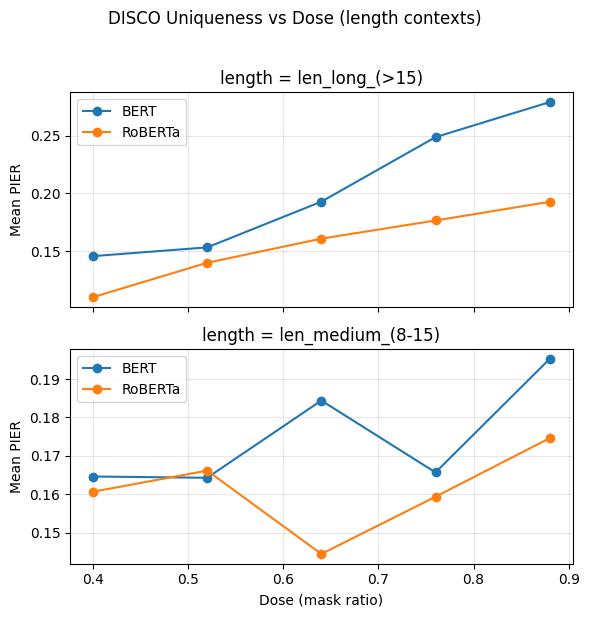

In [4]:
# 只看 BERT 和 RoBERTa
plot_context_type(df, context_type="length", target_models=["BERT", "RoBERTa"])
